<a href="https://colab.research.google.com/github/DiegoGuerrero1/Proyecto_EIII/blob/main/tweepySA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [21]:
#Upload the login file
from google.colab import files
files.upload()

{}

In [22]:
consumer_key = "7vEhyag0cpY5483DT1RuidcX3"
consumer_secret = "VxbkpCTlsZvPWM8vthRylmdkZE5haQdVMuO6vhghnjkCwyMHdn"
access_key = "386220193-dVrzPNmAj0IPNAGrZM63ljZv8ZsEBTpLY0bKF8vR"
access_secret = "jAJbYolqJiBcCNJu03XFa0AXOND4RQPZs4LYH8U8mVyfX"


#http://tweepy.readthedocs.org/en/v3.1.0/getting_started.html#api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)


In [23]:
#Filter by any rwteets
search_term = '#apple -filter:rtweets'
#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since= '2021-09-29', tweet_mode= 'extended').items(2000)

textA = [tweet.full_text for tweet in tweets]



In [25]:
dta = pd.DataFrame(textA, columns=['Tweets'])
dta.head(5)

,Tweets
0,RT @Poorvika_Mobile: What if you get Mega Powe...
1,RT @Poorvika_Mobile: It's time for you to achi...
2,RT @viczboy16: Book review https://t.co/tAXw3y...
3,Omni Recover 3.1.5 [23 MB] https://t.co/F2fixM...
4,RT @PjBenji: $shiba Mc is 35b currently. Needs...


In [26]:
#Create a function to clean tweets
def cleanTwt(twt):
  twt = re.sub('#apple', 'apple', twt) #Removes the # from apple
  twt = re.sub('#Apple', 'Apple', twt) #Removes the # from apple
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt)
  return twt


In [28]:
#Clean tweets
dta['Cleaned_Tweets'] = dta['Tweets'].apply(cleanTwt)
dta.head(10)

,Tweets,Cleaned_Tweets
0,RT @Poorvika_Mobile: What if you get Mega Powe...,RT @Poorvika_Mobile: What if you get Mega Powe...
1,RT @Poorvika_Mobile: It's time for you to achi...,RT @Poorvika_Mobile: It's time for you to achi...
2,RT @viczboy16: Book review https://t.co/tAXw3y...,RT @viczboy16: Book review Apple …
3,Omni Recover 3.1.5 [23 MB] https://t.co/F2fixM...,Omni Recover 3.1.5 [23 MB] Apple
4,RT @PjBenji: $shiba Mc is 35b currently. Needs...,RT @PjBenji: $shiba Mc is 35b currently. Needs...
5,"#Amazon #Apple: Lack of computer chips, spikin...","Apple: Lack of computer chips, spiking labour..."
6,@CNBCnow @Apple Not a supply chain issue!! Pe...,@CNBCnow @Apple Not a supply chain issue!! Pe...
7,RT @GCP_MUSIC: Steam Lofi Jazz Beats\nLOFI JAZ...,RT @GCP_MUSIC: Steam Lofi Jazz BeatsLOFI JAZZ ...
8,RT @scpwords: DINO MAKER! Make Dinos and Level...,RT @scpwords: DINO MAKER! Make Dinos and Level...
9,RT @golden991: Time for #Apple to get into the...,RT @golden991: Time for Apple to get into the ...


In [30]:
dft.to_csv("tweets2.csv")

In [29]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two news columns called subjectivity & polarity
dta['Subjectivity'] = dta['Cleaned_Tweets'].apply(getSubjectivity)
dta['Polarity'] = dta['Cleaned_Tweets'].apply(getPolarity)

dta.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,RT @Poorvika_Mobile: What if you get Mega Powe...,RT @Poorvika_Mobile: What if you get Mega Powe...,0.000000,0.000000
1,RT @Poorvika_Mobile: It's time for you to achi...,RT @Poorvika_Mobile: It's time for you to achi...,0.535714,0.285714
2,RT @viczboy16: Book review https://t.co/tAXw3y...,RT @viczboy16: Book review Apple …,0.000000,0.000000
3,Omni Recover 3.1.5 [23 MB] https://t.co/F2fixM...,Omni Recover 3.1.5 [23 MB] Apple,0.000000,0.000000
4,RT @PjBenji: $shiba Mc is 35b currently. Needs...,RT @PjBenji: $shiba Mc is 35b currently. Needs...,0.450000,0.125000


In [30]:
#Create a fuction to get the sentiment score
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [39]:
#Create a column to store the next sentiment
dta['Sentiment'] = dta['Polarity'].apply(getSentiment)
dta.head(10)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,RT @Poorvika_Mobile: What if you get Mega Powe...,RT @Poorvika_Mobile: What if you get Mega Powe...,0.000000,0.000000,Neutral
1,RT @Poorvika_Mobile: It's time for you to achi...,RT @Poorvika_Mobile: It's time for you to achi...,0.535714,0.285714,Positive
2,RT @viczboy16: Book review https://t.co/tAXw3y...,RT @viczboy16: Book review Apple …,0.000000,0.000000,Neutral
3,Omni Recover 3.1.5 [23 MB] https://t.co/F2fixM...,Omni Recover 3.1.5 [23 MB] Apple,0.000000,0.000000,Neutral
4,RT @PjBenji: $shiba Mc is 35b currently. Needs...,RT @PjBenji: $shiba Mc is 35b currently. Needs...,0.450000,0.125000,Positive
5,"#Amazon #Apple: Lack of computer chips, spikin...","Apple: Lack of computer chips, spiking labour...",0.000000,0.000000,Neutral
6,@CNBCnow @Apple Not a supply chain issue!! Pe...,@CNBCnow @Apple Not a supply chain issue!! Pe...,0.533333,-0.016667,Negative
7,RT @GCP_MUSIC: Steam Lofi Jazz Beats\nLOFI JAZ...,RT @GCP_MUSIC: Steam Lofi Jazz BeatsLOFI JAZZ ...,0.000000,0.000000,Neutral
8,RT @scpwords: DINO MAKER! Make Dinos and Level...,RT @scpwords: DINO MAKER! Make Dinos and Level...,0.000000,0.000000,Neutral
9,RT @golden991: Time for #Apple to get into the...,RT @golden991: Time for Apple to get into the ...,0.000000,0.000000,Neutral


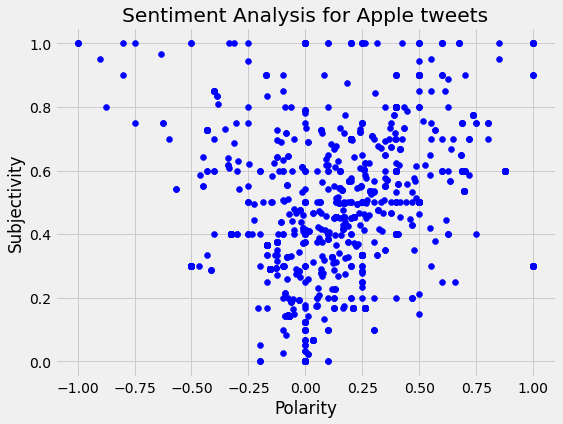

In [36]:
#Create a scatter plot to show the new columns
plt.figure(figsize=(8,6))
for i in range(0, dta.shape[0]):
  plt.scatter(dta['Polarity'][i], dta['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis for Apple tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [38]:
dta['Sentiment'].value_counts.plot(kind='bar')
plt.title('Sentiment Analysis Bar plot')
plt.xlabel('Polarity')
plt.ylabel('number of tweets)')
plt.show()

AttributeError: ignored

In [40]:
dta.to_csv("sentimentTweetsApple.csv")

In [43]:
dta.describe()

,Subjectivity,Polarity
count,2000.000000,2000.000000
mean,0.304578,0.072502
std,0.299947,0.292362
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.300000,0.000000
75%,0.500000,0.200000
max,1.000000,1.000000
